## 0. Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
cd ~/CRG/scripts

/home/etiavlovsky/CRG/scripts


## 1. Forming full feature data set

## 2. Preparing inputs for Machine Learning

In [4]:
%run ML_inputs.py
ML_inputs = get_ML_inputs()



1. Encoding categorical features

	There are (5,) unique values for "cat" feature.
	['AG' 'AP' 'EN' 'IN' 'SG']

	There are (2,) unique values for "strand" feature.
	['+' '-']

	There are (5,) unique values for "cat" feature.
	['AG' 'AP' 'EN' 'IN' 'SG']

	There are (2,) unique values for "strand" feature.
	['+' '-']


2. Identifying features present in the dataset

	69 features of type 'distance' are present

	1 features of type 'row_sum' are present

	58 features of type 'chip_c_hb_r' are present

	1 features of type 'intra_inter_ratio' are present

	58 features of type 'chip_c_zb_r' are present

	58 features of type 'chip_c_hb' are present
		Excluding feature type: 'chip_c_hb'

	1 features of type 'ab_score' are present

	58 features of type 'chip_c_zb' are present
		Excluding feature type: 'chip_c_zb'

	7 features of type 'one_hot' are present

	1 features of type 'contact_decay' are present

	1 features of type 'gmfpt' are present

	List of excluded individual features:
	['DNA', '

## Running Machine Learning

In [5]:
%run ML_process.py

### Testing my pipline

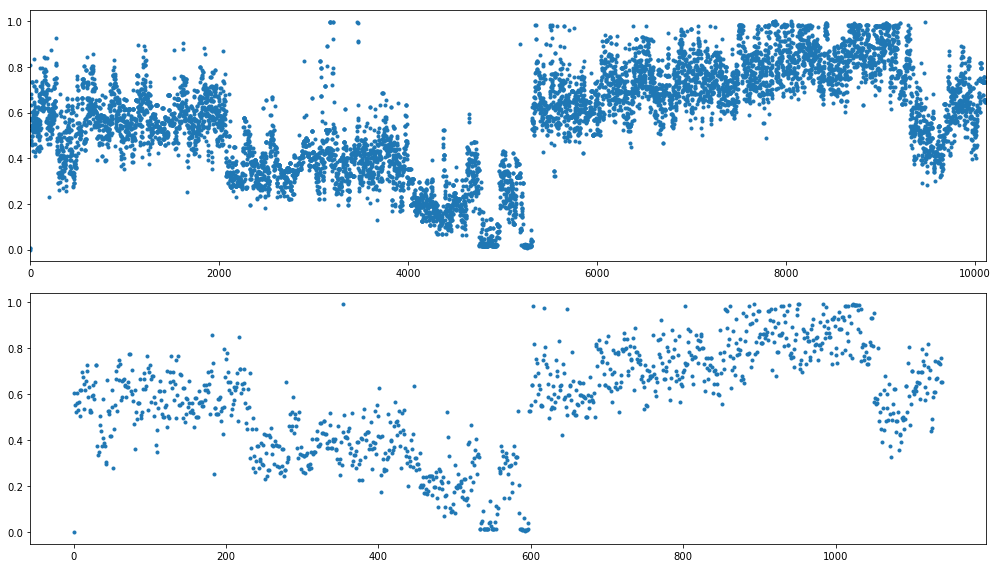

In [181]:
feature = "gmfpt"
array = ML_inputs["train_samples"][:,ML_inputs["feature_types"][feature]].ravel().astype(float)
array = array[np.isfinite(array)]
%run myplot
f,ax = myplot(array,shape=(2,1),style=".")
array = ML_inputs["test_samples"][:,ML_inputs["feature_types"][feature]].ravel().astype(float)
array = array[np.isfinite(array)]
ax[1].plot(array,".")

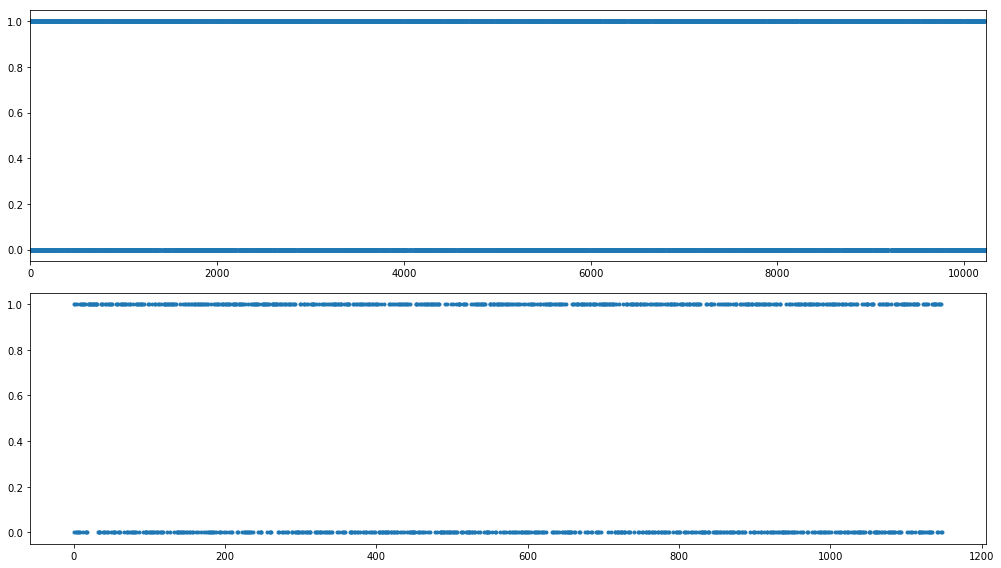

In [6]:
targets = ML_inputs["train_targets"].ravel().astype(float)
targets = targets[np.isfinite(targets)]
%run myplot
f,ax = myplot(targets,shape=(2,1),style=".")
targets = ML_inputs["test_targets"].ravel().astype(float)
targets = targets[np.isfinite(targets)]
ax[1].plot(targets,".")

In [187]:
ML_inputs.data.feature_names[ML_inputs.data.mask.features_mask]

array(['ab_score', 'intra_inter_ratio', 'row_sum', 'gmfpt', 'c_decay',
       'cat_oh__AG', 'cat_oh__AP', 'cat_oh__EN', 'cat_oh__IN',
       'strand_oh__-'], 
      dtype='|S22')

In [188]:
min_value = ML_inputs.data.preprocessing["targets"].min_value
max_value = ML_inputs.data.preprocessing["targets"].max_value

In [189]:
print ML_inputs.data.preprocessing["targets"].fields
print ML_inputs.data.preprocessing["targets"].weights

{}
[ 0.80420378 -0.21944134  0.47554252 -0.22908507  0.55997798 -0.63320333
  0.6462903  -0.84156985 -0.23720268  0.46825053]


In [191]:
print clf.best_estimator_.coef_*(max_value-min_value)

[ 0.81468222 -0.21683588  0.47200606 -0.2202652   0.55644136 -0.63428358
  0.65656113 -0.84386213 -0.23378928  0.47051041]


In [159]:
X,y = ML_inputs.get_data("train")
array = np.sum(X * ML_inputs.data.preprocessing["targets"].weights,axis = 1)
(array-np.min(array))/(np.max(array)-np.min(array))

array([ 0.44495092,  0.4497785 ,  0.53001784, ...,  0.62099503,
        0.47841267,  0.61757489])

In [173]:
clf.best_estimator_.intercept_*(max_value-min_value)+min_value

array([ 0.])

In [141]:
y

array([ 0.44495092,  0.4497785 ,  0.53001784, ...,  0.62099503,
        0.47841267,  0.61757489])

In [147]:
np.sum(X * clf.best_estimator_.coef_,axis = 1)+clf.best_estimator_.intercept_

array([ 0.44106359,  0.44554175,  0.52750619, ...,  0.62176457,
        0.47958616,  0.61861188])

### Regression


	Running ML with Linear_R ...

		Time taken:1.18

		CV 'train' score (mean +/- 2*sd): 0.08 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): -0.06 (+/- 0.04)

	Train score is 0.07

	Test score is 0.04


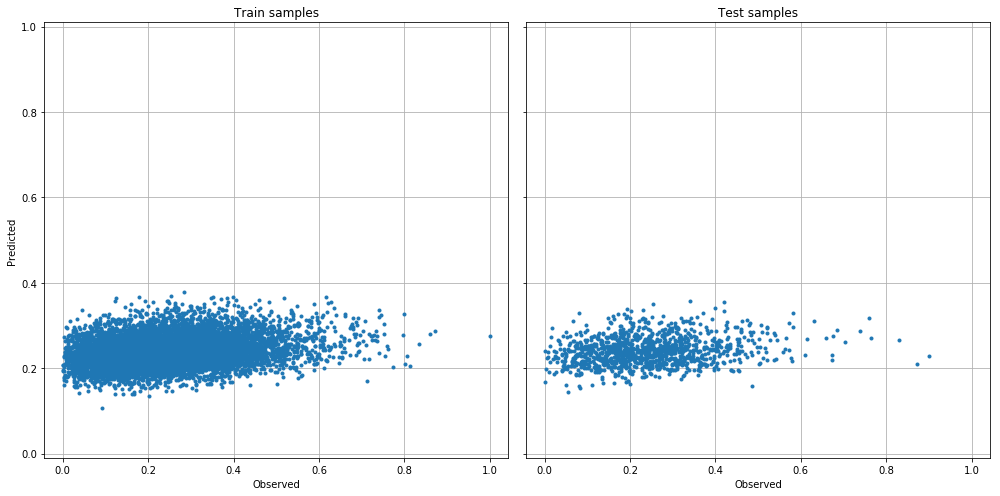

In [9]:
estimator = "Linear_R"
clf = run_ML(ML_inputs,estimator,fit_intercept = True)

ERROR:root:File `u'ML_pipelines.py'` not found.



	Running ML with Lasso_R ...

	Performing parameter grid search...

		Time taken:2.29

		Best parameters: {'alpha': 0.0001}

		CV 'train' score (mean +/- 2*sd): 0.06 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): 0.03 (+/- 0.02)

	Train score is 0.05

	Test score is 0.04


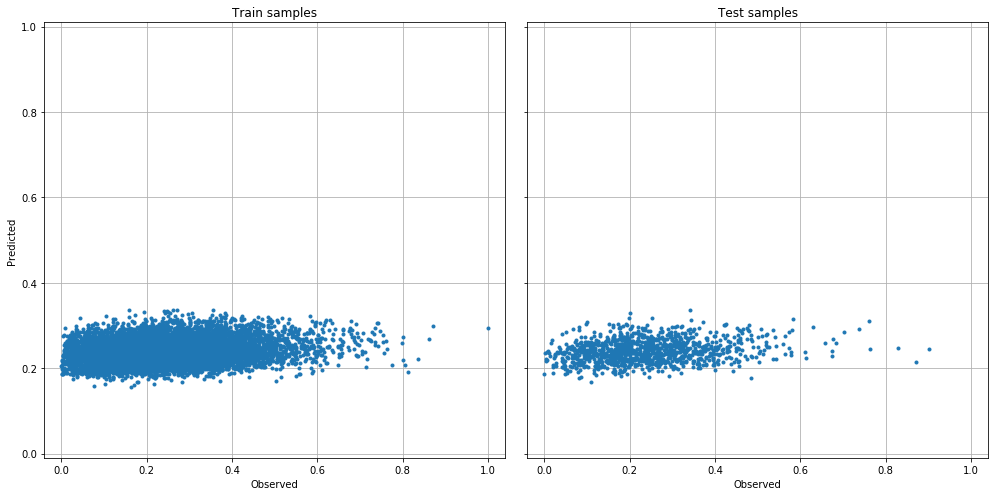

In [10]:
estimator = "Lasso_R"
clf = run_ML(ML_inputs,estimator,parameters = {"alpha":(1e-4,)})


	Running ML with RForest_R ...

	Performing parameter grid search...

		Time taken:178.11

		Best parameters: {'max_features': 'sqrt', 'min_samples_split': 300, 'n_estimators': 30}

		CV 'train' score (mean +/- 2*sd): 0.13 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): 0.03 (+/- 0.00)

	Train score is 0.13

	Test score is 0.03


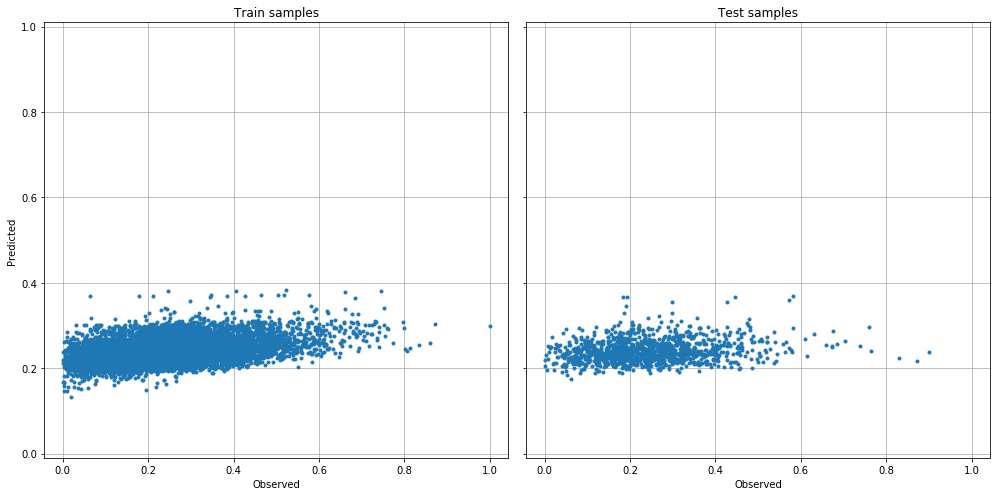

In [12]:
estimator = "RForest_R"
clf = run_ML(ML_inputs,estimator)


	Running ML with DTree_R ...

	Performing parameter grid search...

		Time taken:6.03

		Best parameters: {'max_features': 'sqrt', 'min_samples_split': 300}

		CV 'train' score (mean +/- 2*sd): 0.12 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): -0.10 (+/- 0.09)

	Train score is 0.12

	Test score is -0.02


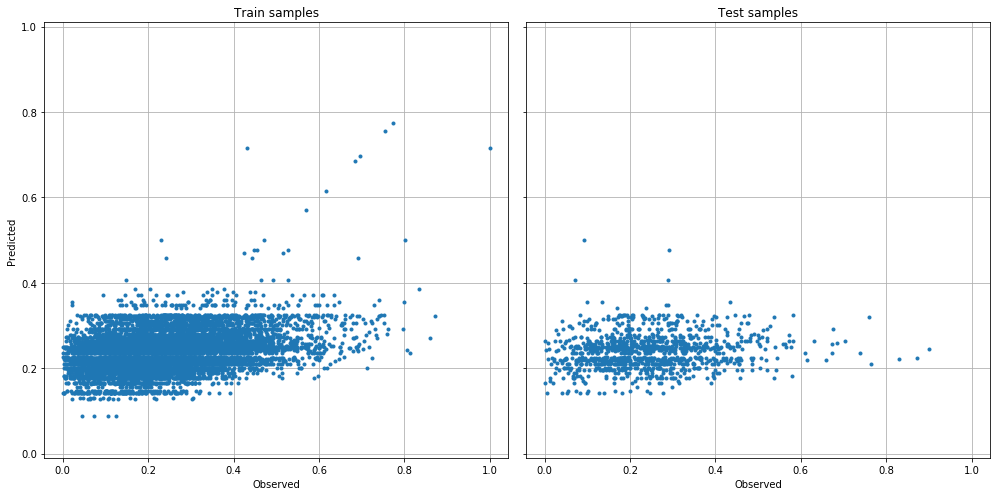

In [13]:
estimator_name = "DTree_R"
clf = run_ML(ML_inputs,estimator_name)


	Running ML with kNN_R ...

	Performing parameter grid search...

		Time taken:165.03

		Best parameters: {'n_neighbors': 100, 'weights': 'distance'}

		CV 'train' score (mean +/- 2*sd): 1.00 (+/- 0.00)

		CV 'test' score (mean +/- 2*sd): 0.02 (+/- 0.01)

	Train score is 1.00

	Test score is 0.03


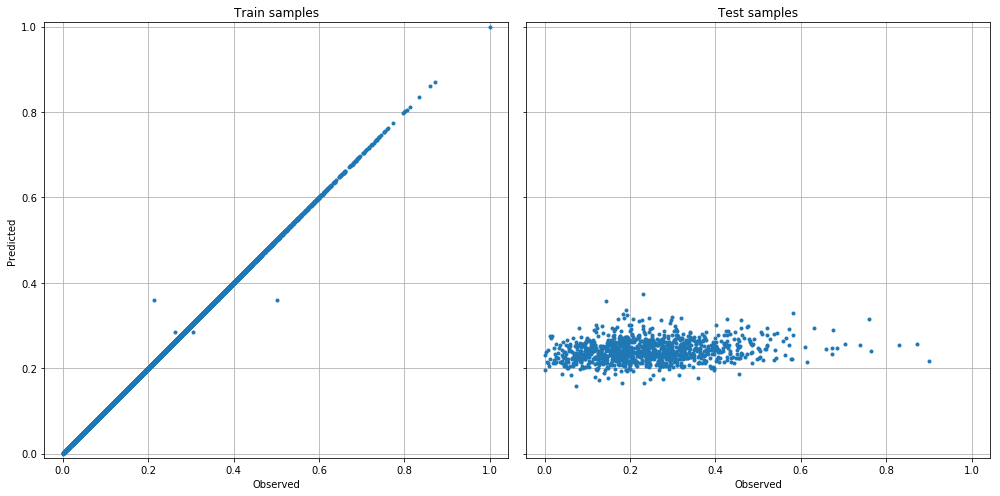

In [22]:
estimator = "kNN_R"
clf = run_ML(ML_inputs,estimator)


	Running ML with GradBoost_R ...

	Performing parameter grid search...

		Time taken:1240.58

		Best parameters: {'n_estimators': 100, 'loss': 'huber', 'max_depth': 1}

		CV 'train' score (mean +/- 2*sd): 0.06 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): 0.03 (+/- 0.01)

	Train score is 0.05

	Test score is 0.03


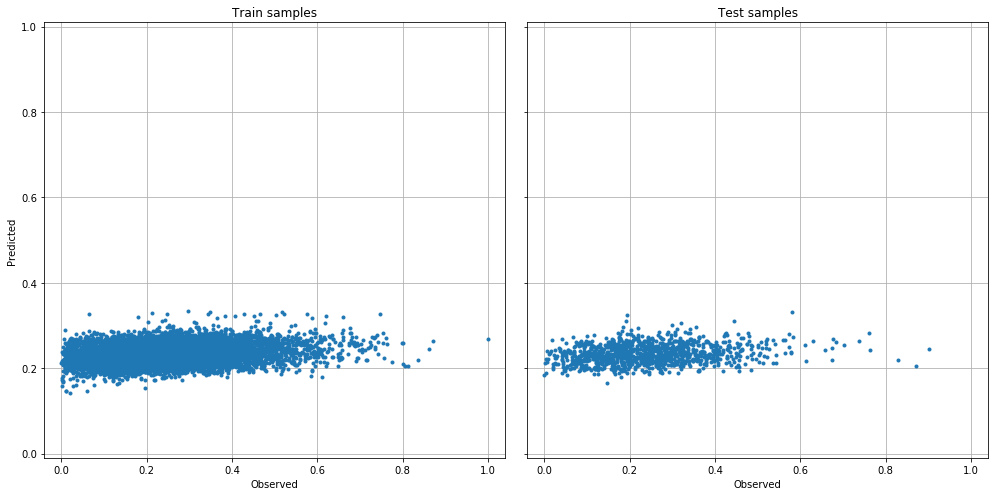

In [23]:
estimator = "GradBoost_R"
clf = run_ML(ML_inputs,estimator)

### Classification


	Running ML with SV_C ...

	Performing parameter grid search...

		Time taken:296.80

		Best parameters: {'C': 0.1, 'gamma': 0.01}

		CV 'train' score (mean +/- 2*sd): 0.56 (+/- 0.01)

		CV 'test' score (mean +/- 2*sd): 0.54 (+/- 0.01)

	Train score is 0.56

	Test score is 0.55


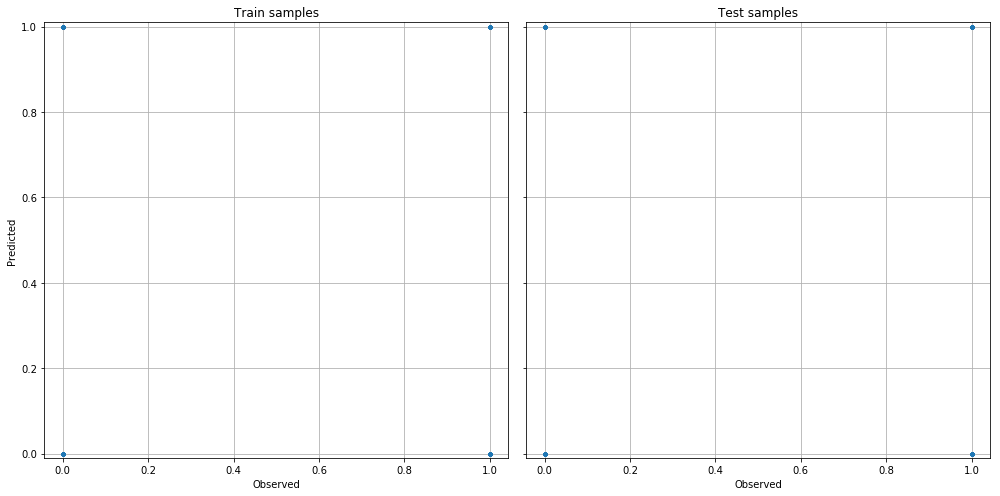

In [10]:
estimator = "SV_C"
clf = run_ML(ML_inputs,estimator)

In [11]:
estimator = "RForest_C"
clf = run_ML(ML_inputs,estimator,parameters = "default")


	Running ML with RForest_C ...

	Performing parameter grid search...


AttributeError: 'str' object has no attribute 'items'